Look at budets of all the imbd over time. budget winners. One visualization we could do is a scatter plot comparing budget to IMDB/Rotten Tomato ratings, and we could highlight the movies that won awards. 

Do better funded movies receive more awards/nominations? Do better funded movies receive higher ratings?Is there a relationship between gross income for a movie and rating or public perception?

In [2]:
import pandas as pd
import numpy as np

In [3]:
oscars = pd.read_csv('oscars.csv')

In [4]:
imdb = pd.read_csv('imdb.csv')
imdb['date_published'] = pd.to_datetime(imdb['date_published'], errors = 'coerce')
imdb = imdb[(imdb['date_published']>'1927-01-01')&(imdb['date_published']<'2016-12-31')]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
streaming = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').set_index('ID').drop('Unnamed: 0', axis = 1)

In [6]:
def winner_nominated(x):
    if x != 1:
        return 0
    else:
        return x
oscars['Winner'] = oscars['Winner'].apply(winner_nominated)
oscars['Winner'].head(3)

0    0.0
1    1.0
2    0.0
Name: Winner, dtype: float64

## Do better rated movies win more awardsscatterplot compairing imdb ratings and rotton tomatoes

In [7]:
df = streaming[['Title', 'IMDb', 'Rotten Tomatoes', 'Year']].merge(oscars[['Winner','Film']], left_on='Title', right_on='Film', how='left')

In [8]:
def percent_to_float(x):
    try:
        x = x.strip('%')
        return float(x)/100
    except:
        return np.nan

percent_to_float('87%')

0.87

In [9]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(percent_to_float)
df.head(3)

,Title,IMDb,Rotten Tomatoes,Year,Winner,Film
0,Inception,8.8,0.87,2010,NaN,NaN
1,The Matrix,8.7,0.87,1999,NaN,NaN
2,Avengers: Infinity War,8.5,0.84,2018,NaN,NaN


In [17]:
np.isnan(df.loc[0]['Winner'])

True

In [20]:
import matplotlib.pyplot as plt

In [33]:
winners = df[df['Winner']==1]
nominated = df[df['Winner']==0]
other = df[np.isnan(df['Winner'])]

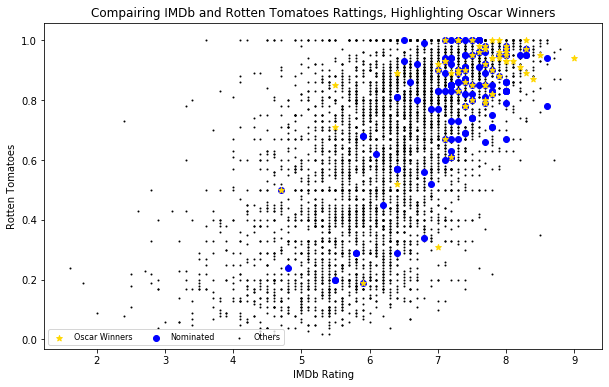

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
other = plt.scatter(other['IMDb'], other['Rotten Tomatoes'], c='black',s=1)
nominated = plt.scatter(nominated['IMDb'], nominated['Rotten Tomatoes'], c='blue')
winners = plt.scatter(winners['IMDb'], winners['Rotten Tomatoes'], c='gold', marker='*')
plt.title('Compairing IMDb and Rotten Tomatoes Rattings, Highlighting Oscar Winners')
plt.xlabel("IMDb Rating")
plt.ylabel("Rotten Tomatoes")
plt.legend((winners, nominated, other), ('Oscar Winners', 'Nominated', 'Others'), scatterpoints=1, loc='lower left', ncol=3, fontsize=8)
plt.show()

It is nice to see that better rather movies do in general get rewarded with winning awards

Is there a statistical difference in mean IMDb and Rotten Tomato scores between winners and non winners?

In [ ]:
df.groupby('Winners')

## How has the funding of movies increased over time?
scatter plot showing ratings over time

In [18]:
df2 = imdb[['title', 'budget', 'avg_vote', 'date_published']].merge(oscars[['Winner','Film']], left_on='title', right_on='Film', how='left')

In [19]:
def budget(x):
    try:
        x=x.strip('$ ')
        return int(x)
    except:
        return np.nan
df2['budget'] = df2['budget'].apply(budget)
df2['budget'].head()

0         NaN
1         NaN
2         NaN
3         NaN
4    351000.0
Name: budget, dtype: float64

In [20]:
winners2 = df2[df2['Winner']==1]
nominated2 = df2[df2['Winner']==0]
other2 = df2[df2['Winner']!=1]

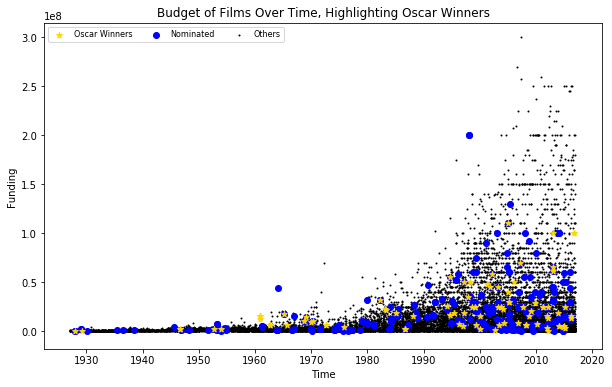

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
other = plt.scatter(other2['date_published'], other2['budget'], c='black', s=1)
winners = plt.scatter(nominated2['date_published'], nominated2['budget'], c='blue')
winners = plt.scatter(winners2['date_published'], winners2['budget'], c='gold', marker='*')
plt.title('Budget of Films Over Time, Highlighting Oscar Winners')
plt.xlabel("Time")
plt.ylabel("Funding")
plt.legend((winners, nominated, other), ('Oscar Winners', 'Nominated', 'Others'), scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
plt.show()

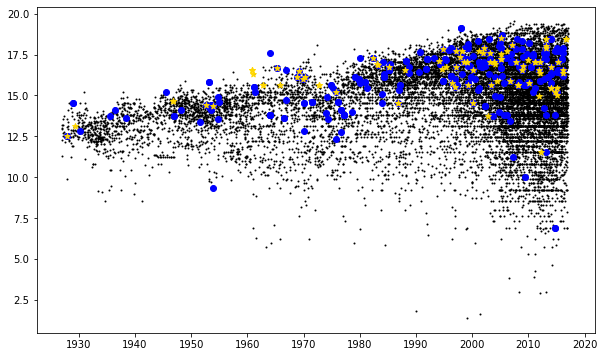

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
other = plt.scatter(other2['date_published'], np.log(other2['budget']), c='black', s=1)
winners = plt.scatter(nominated2['date_published'], np.log(nominated2['budget']), c='blue')
winners = plt.scatter(winners2['date_published'], np.log(winners2['budget']), c='gold', marker='*')
plt.show()

As expected, the budgets for movies has grown exponentially. But what is good to see is that for recent movies at lease, you cant really buy awards. Lot of nominations and winners are towards the bottom. However, if we look at the log numbers it doesnt actually look to matter? we will talk about this as a group.

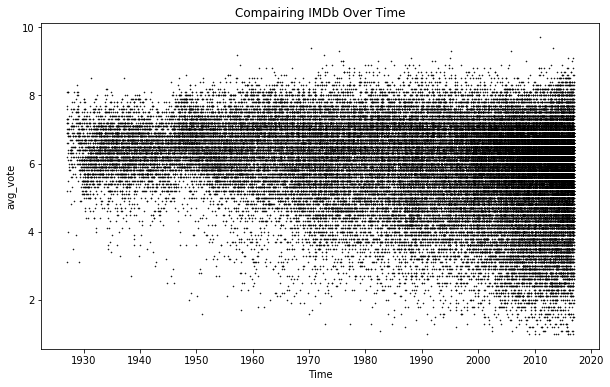

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(imdb['date_published'], imdb['avg_vote'], c='black', s =.3)
plt.title('Compairing IMDb Over Time')
plt.xlabel("Time")
plt.ylabel("avg_vote")
plt.show()

So there is a little bit of a recency bias, but thats not suprising. What I was really checking for is if there was a difference in how newer and older mives were rated on IMDb. And, kinda like yeah. They are rated maube a little higher on average than newer movies. I expect this is becuase people only choose to watch, then rate, old movies that are already known to be good.

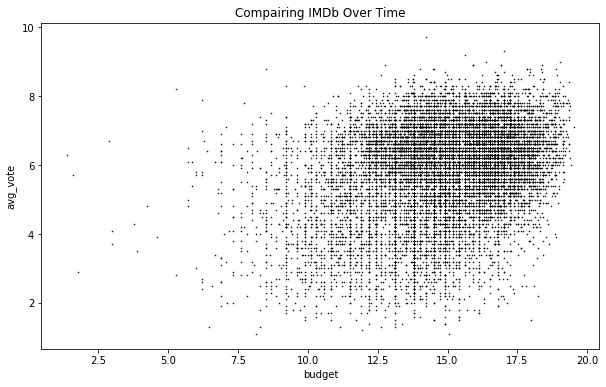

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df2['budget'], df2['avg_vote'], c='black', s =.3)
plt.title('Compairing IMDb Over Time')
ax.set_yscale('symlog')
plt.xlabel("budget")
plt.ylabel("avg_vote")
plt.show()

i did the log of thse becuase the big budget movies dwarfed the others. We have to talk about this.